In [32]:
import numpy as np
import matplotlib.pyplot as plt


In [33]:
# Initialize position and velocity of particles
pos= np.zeros((3,1000))
np.random.seed(0)
for j in range(100):
   for i in range(10):
      pos[0,j+100*i:j+100*(i+1)-1]= i%10
for j in range(10):
   for i in range(100):
      pos[1,j+10*i:j+10*(i+1)-1]=i%10
for i in range(1000):
    pos[2,i]=i%10

vel = np.random.rand(3, 1000)
vel=vel-0.5
vel=vel*176.8
# Constants
dt = 0.001
n_steps = 10000
sigma = 3.54
epsilon = 0.185
r_cutoff = 2.5*sigma
box_size = 1000


Function defined which is repeated in every loop to find distance between particles

In [34]:
#function to return distances
def get_dist(i):
    pos_copy = np.copy(pos)
    point = pos_copy[:,i,None]
    pos_dir = pos_copy - point
    dist = np.sqrt(np.sum(pos_dir**2,axis = 0))
    return dist, pos_dir


To store the distance between two particles and update the neighbours list


In [35]:
#updating array distances
distances = np.zeros((1000,1000))
distance_vector=np.zeros((3,1000,1000))
for i in range(1000):
    distances[i,:], distance_vector[:,:,i] = get_dist(i)
# neighbour_list = []
# neighbours=[]
# for i in range(1000):
#     for j in range(1000):    
#         if(distances[i][j]<=r_cutoff):
#             neighbours.append(j)
# neighbour_list.append(neighbours)

neighbours = distances < r_cutoff
friends = distances >= r_cutoff 
friends = distances < r_cutoff +1


Simulation loop begins implementing velocity verlet algorithm
time complexity ~ O(n^3)

5430.677709908464 1.638451132318707e+24 6.314764482881054e+21 8.4440308612159e+22


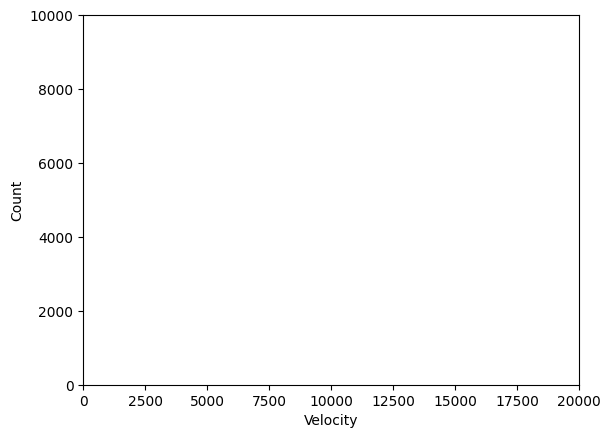

12586.938691855154 4.915353396956121e+24 1.894429344864316e+22 2.5332092583647702e+23
13934.189275799883 8.192255661593536e+24 3.1573822414405266e+22 4.222015430607951e+23
12033.791837324465 1.146915792623095e+25 4.420335138016737e+22 5.91082160285113e+23
12809.984779149101 1.4746060190868365e+25 5.683288034592948e+22 7.599627775094313e+23
15874.895998013331 1.8022962455505778e+25 6.946240931169159e+22 9.28843394733749e+23
17282.846272145587 2.1299864720143196e+25 8.209193827745373e+22 1.0977240119580674e+24
17372.745325387026 2.4576766984780605e+25 9.472146724344924e+22 1.2666046291823676e+24
17496.02297547081 2.785366924941802e+25 1.073509962094448e+23 1.4354852464066684e+24
17651.979909317655 3.113057151405543e+25 1.1998052517544402e+23 1.6043658636309682e+24
17839.759090946594 3.4407473778692845e+25 1.3261005414169697e+23 1.77324648085525e+24


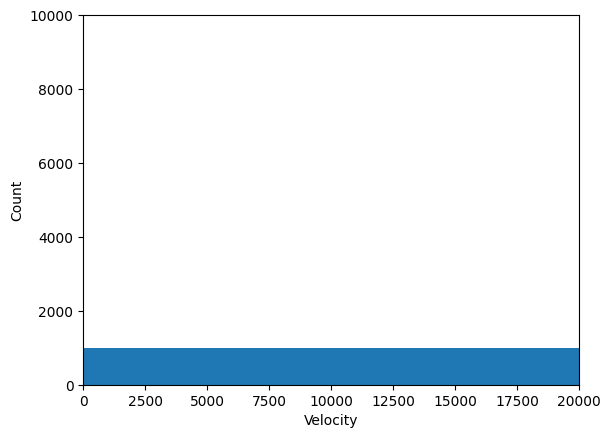

18058.367840709612 3.768437604333026e+25 1.4523958310794988e+23 1.942127098079531e+24
18306.701741740493 4.096127830796767e+25 1.5786911207420282e+23 2.111007715303812e+24
18583.569172659478 5.417059153959252e+37 1.0834118307935553e+35 2.4201587062727335e+36


C:\Users\prath\AppData\Local\Temp\ipykernel_9112\3494918670.py:52: RuntimeWarning: overflow encountered in scalar power
  force_new[:,i] += (24*epsilon*(2*(sigma**12/distances[i,j]**13) - (sigma**6/distances[i,j]**7)))*(distance_vector[:,i,j]/distances[i,j])


18887.715390493926 1.0834118307918504e+38 2.1668236615855323e+35 4.840317412545474e+36
19217.84527705664 1.6251177461877756e+38 3.250235492377509e+35 7.260476118818215e+36
19572.644084455766 2.166823661583701e+38 4.3336473231694856e+35 9.680634825090955e+36
19950.795742625913 2.7085295769796257e+38 5.417059153961461e+35 1.2100793531363696e+37
20350.998501657974 3.2502354923755513e+38 6.500470984753439e+35 1.4520952237636436e+37
20771.97785980661 3.7919414077714765e+38 7.583882815545416e+35 1.6941110943909177e+37
21212.49686730473 4.333647323167402e+38 8.667294646337394e+35 1.9361269650181917e+37


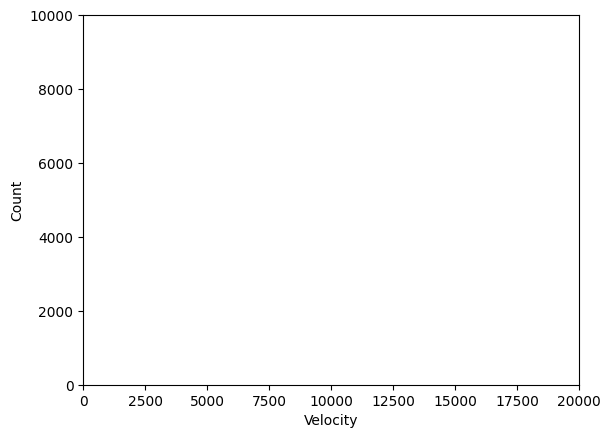

21671.36399550881 4.875353238563327e+38 9.75070647712937e+35 2.178142835645466e+37
22147.438823700682 5.417059153959251e+38 1.0834118307921345e+36 2.42015870627274e+37
22639.63582782636 5.9587650693551765e+38 1.1917530138713321e+36 2.662174576900014e+37
23146.92656330295 6.5004709847511025e+38 1.30009419695053e+36 2.904190447527288e+37
23668.340524434458 7.042176900147028e+38 1.4084353800297276e+36 3.146206318154562e+37
24202.964941873106 7.583882815542954e+38 1.5167765631089256e+36 3.3882221887818363e+37
24536.350338157412 8.12558873093888e+38 1.6251177461881232e+36 3.630238059409111e+37
24536.350333904382 8.667294646334805e+38 1.7334589292673208e+36 3.872253930036385e+37
24536.350329651345 9.209000561730732e+38 1.8418001123465187e+36 4.11426980066366e+37
24536.35032539831 9.750706477126657e+38 1.9501412954257164e+36 4.3562856712909335e+37


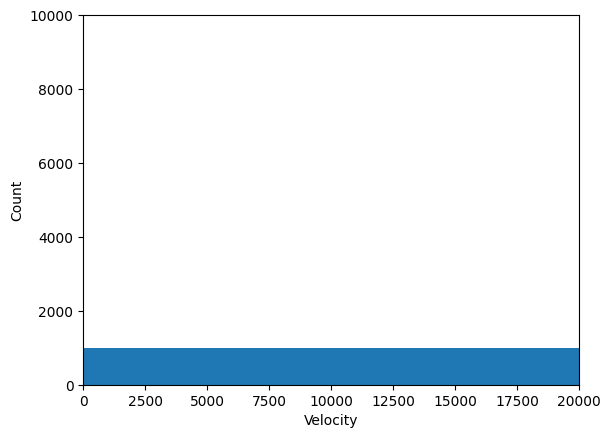

24536.350321145277 1.0292412392522582e+39 2.058482478504914e+36 4.598301541918207e+37
24536.35031689224 1.0834118307918507e+39 2.166823661584112e+36 4.840317412545482e+37
24536.350312639206 1.1375824223314434e+39 2.2751648446633098e+36 5.082333283172757e+37
24536.350308386172 1.1917530138710358e+39 2.3835060277425075e+36 5.324349153800031e+37
24536.350304133135 1.2459236054106284e+39 2.491847210821705e+36 5.566365024427304e+37
24536.3502998801 1.300094196950221e+39 2.6001883939009027e+36 5.808380895054578e+37
24536.350295627064 1.3542647884898136e+39 2.7085295769801006e+36 6.050396765681854e+37
24536.35029137403 1.408435380029406e+39 2.816870760059298e+36 6.292412636309129e+37
24536.350287120997 1.4626059715689987e+39 2.9252119431384965e+36 6.534428506936402e+37
24536.350282867963 1.5167765631085912e+39 3.0335531262176935e+36 6.776444377563675e+37


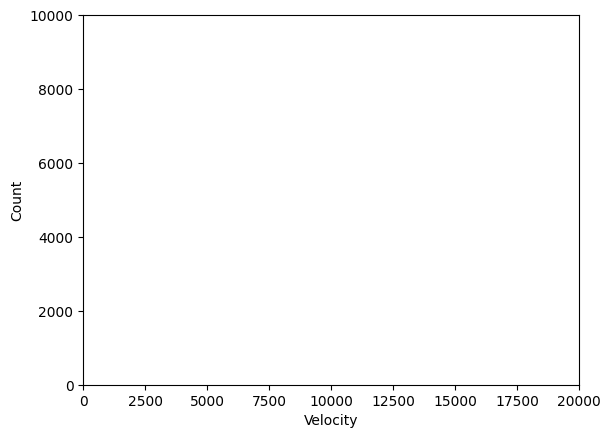

24536.35027861493 1.5709471546481837e+39 3.141894309296892e+36 7.018460248190949e+37
24536.350274361892 1.6251177461877765e+39 3.25023549237609e+36 7.260476118818225e+37
24536.35027010886 1.679288337727369e+39 3.358576675459157e+36 7.502491989445483e+37
24536.350265855825 1.7334589292669616e+39 3.466917858542224e+36 7.744507860072738e+37
24536.350261602787 1.7876295208065544e+39 3.575259041625291e+36 7.986523730699998e+37
24536.350257349754 1.8418001123461466e+39 3.683600224708358e+36 8.228539601327251e+37
24536.35025309672 1.895970703885739e+39 3.791941407791425e+36 8.470555471954508e+37
24536.350248843682 1.950141295425332e+39 3.900282590874493e+36 8.712571342581765e+37
24536.35024459065 2.0043118869649245e+39 4.008623773957559e+36 8.954587213209023e+37
24536.35024033761 2.058482478504517e+39 4.116964957040626e+36 9.196603083836282e+37


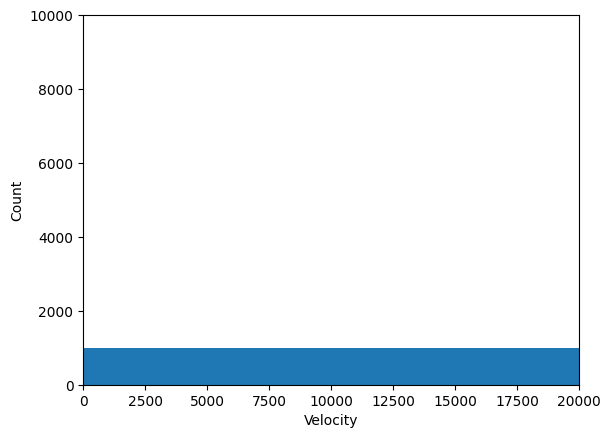

24536.35023608458 2.1126530700441095e+39 4.225306140123693e+36 9.438618954463536e+37
24536.350231831544 2.1668236615837023e+39 4.3336473232067613e+36 9.680634825090794e+37
24536.35022757851 2.2209942531232946e+39 4.441988506289828e+36 9.922650695718052e+37
24536.350223325477 2.2751648446628874e+39 4.550329689372895e+36 1.016466656634531e+38
24536.35021907244 2.32933543620248e+39 4.658670872455961e+36 1.0406682436972566e+38
24536.350214819406 2.383506027742072e+39 4.767012055539028e+36 1.0648698307599821e+38
24536.350210566372 2.4376766192816647e+39 4.875353238622095e+36 1.0890714178227077e+38
24536.350206313335 2.4918472108212575e+39 4.9836944217051634e+36 1.1132730048854335e+38
24536.3502020603 2.54601780236085e+39 5.09203560478823e+36 1.1374745919481593e+38
24536.350197807267 2.6001883939004428e+39 5.2003767878712974e+36 1.161676179010885e+38


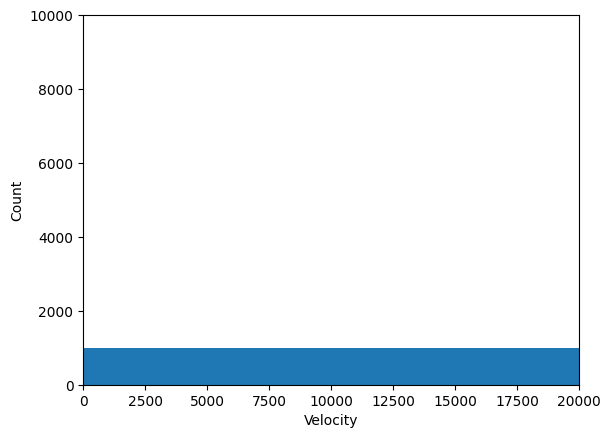

24536.35019355423 2.654358985440035e+39 5.308717970954364e+36 1.1858777660736106e+38
24536.3501893012 2.7085295769796276e+39 5.417059154037431e+36 1.2100793531363362e+38
24536.350185048163 2.76270016851922e+39 5.525400337120497e+36 1.2342809401990618e+38
24536.35018079513 2.816870760058813e+39 5.633741520203566e+36 1.2584825272617874e+38
24536.350176542095 2.8710413515984054e+39 5.742082703286633e+36 1.2826841143245136e+38
24536.350172289058 2.925211943137998e+39 5.850423886369699e+36 1.3068857013872393e+38
24536.350168036024 2.9793825346775905e+39 5.958765069452767e+36 1.3310872884499645e+38
24536.35016378299 3.033553126217183e+39 6.067106252535832e+36 1.3552888755126903e+38
24536.350159529953 3.0877237177567755e+39 6.1754474356189e+36 1.3794904625754161e+38
24536.35015527692 3.1418943092963686e+39 6.283788618701968e+36 1.4036920496381423e+38


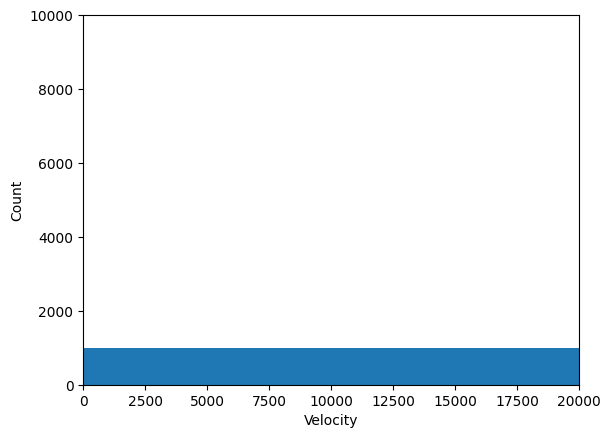

24536.350151023886 3.196064900835961e+39 6.392129801785035e+36 1.4278936367008678e+38
24536.35014677085 3.250235492375553e+39 6.500470984868102e+36 1.452095223763593e+38
24536.35014251782 3.304406083915146e+39 6.608812167951169e+36 1.476296810826319e+38
24536.35013826478 3.358576675454739e+39 6.717153351034236e+36 1.500498397889045e+38
24536.350134011747 3.412747266994331e+39 6.825494534117304e+36 1.5246999849517704e+38
24536.35012975871 3.466917858533924e+39 6.93383571720037e+36 1.548901572014496e+38
24536.350125505676 3.521088450073516e+39 7.042176900283438e+36 1.573103159077222e+38
24536.350121252643 3.575259041613109e+39 7.150518083366505e+36 1.5973047461399473e+38
24536.35011699961 3.6294296331527013e+39 7.258859266449571e+36 1.6215063332026731e+38
24536.35011274657 3.683600224692294e+39 7.367200449532638e+36 1.6457079202653985e+38


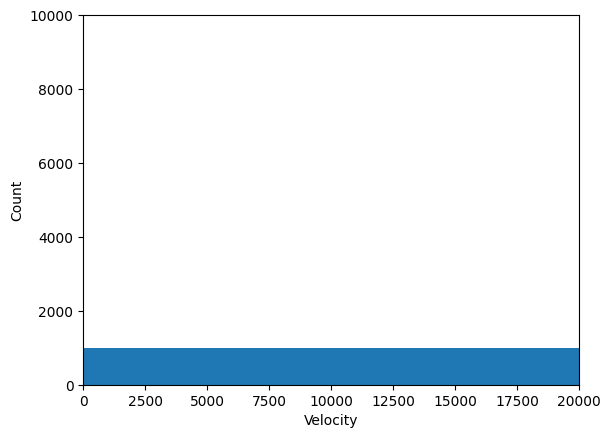

24536.350108493538 3.7377708162318864e+39 7.475541632615705e+36 1.6699095073281245e+38
24536.350104240504 3.791941407771479e+39 7.583882815698772e+36 1.69411109439085e+38
24536.35009998747 3.846111999311072e+39 7.692223998781842e+36 1.7183126814535762e+38
24536.350095734437 3.9002825908506645e+39 7.800565181864908e+36 1.742514268516302e+38
24536.3500914814 3.954453182390257e+39 7.908906364947975e+36 1.7667158555790278e+38
24536.350087228366 4.0086237739298496e+39 8.017247548031042e+36 1.790917442641753e+38
24536.35008297533 4.0627943654694415e+39 8.125588731114107e+36 1.815119029704478e+38
24536.350078722295 4.1169649570090346e+39 8.233929914197176e+36 1.839320616767204e+38
24536.35007446926 4.171135548548627e+39 8.342271097280243e+36 1.8635222038299297e+38
24536.350070216227 4.2253061400882197e+39 8.450612280363309e+36 1.887723790892656e+38


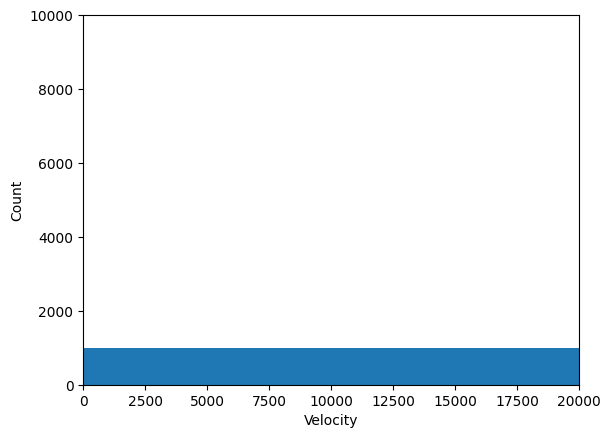

24536.35006596319 4.279476731627813e+39 8.558953463446378e+36 1.9119253779553817e+38
24536.350061710156 4.333647323167405e+39 8.667294646529443e+36 1.936126965018107e+38
24536.350057457123 4.387817914706997e+39 8.775635829612511e+36 1.960328552080833e+38
24536.350053204085 4.44198850624659e+39 8.883977012695578e+36 1.9845301391435586e+38
24536.350048951055 4.496159097786183e+39 8.992318195778645e+36 2.008731726206284e+38
24536.350044698018 4.550329689325775e+39 9.100659378861712e+36 2.0329333132690098e+38
24536.350040444984 4.6045002808653673e+39 9.209000561944779e+36 2.0571349003317356e+38
24536.350036191947 4.6586708724049604e+39 9.317341745027847e+36 2.0813364873944613e+38
24536.350031938913 4.712841463944553e+39 9.425682928110915e+36 2.105538074457187e+38


In [36]:
import time 
# Velocity Verlet algorithm
n_steps = 100
force = np.zeros((3, 1000))
force_new = np.zeros((3, 1000))
distances = distances + 0.00001
k=0
for step in range(n_steps):
    
    if(k==0):
        for i in range(1000):
            for j,bool in enumerate(list(neighbours[i,:])):
                if bool == False and i==j: continue
                force[:,i] += (24*epsilon*(2*(sigma**12/distances[i,j]**13) - (sigma**6/distances[i,j]**7)))*(distance_vector[:,i,j]/distances[i,j])
    k+=1
    #abs_force = np.linalg.norm(force,axis=0)
    #print(abs_force.min(),abs_force.max(),abs_force.mean(),abs_force.std())

    # Update positions
    pos += vel*dt + 0.5*force*dt**2
    #Check for wall crossings and handle them
    for k in range(1000):
        for j in range(3):
            if (pos[0][k] > box_size):
                pos[0][k] = pos[0][k]-box_size

            if (pos[1][k] > box_size):
                pos[1][k] = pos[0][k]-box_size

            if (pos[2][k] > box_size):
                pos[2][k] = pos[0][k]-box_size    

                if pos[0][k] < 0:
                    pos[0][k] = pos[0][k]+box_size

                if pos[1][k] < 0:
                    pos[1][k] = pos[1][k]+box_size  
                    
                if pos[2][k] < 0:
                    pos[2][k] = pos[2][k]+box_size  
        
    # Update distances
    for k in range(1000):
        distances[k,:], distance_vector[:,:,k] = get_dist(k)
    distances = distances + 0.00001

    neighbours = distances < r_cutoff

    for i in range(1000):
        for j,bool in enumerate(list(neighbours[i,:])):
            if bool == False and i==j: continue
            force_new[:,i] += (24*epsilon*(2*(sigma**12/distances[i,j]**13) - (sigma**6/distances[i,j]**7)))*(distance_vector[:,i,j]/distances[i,j])

    vel += (force + force_new)*dt/2

    force = force_new

    abs_vel = np.linalg.norm(vel, axis=0)
    print(abs_vel.min(),abs_vel.max(),abs_vel.mean(),abs_vel.std())
    vel1=np.sqrt(vel*vel)   
       
    #Plot velocity of particles
    if(step%10==0):
         plt.hist(np.linalg.norm(vel1, axis=0), bins=50)
         plt.xlim(0,20000)
         plt.ylim(0,10000)
         plt.xlabel('Velocity')
         plt.ylabel('Count')
         plt.show() 
    #print(step)  
